## Using KMeans Model

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Import preprocessed feature dataset
df = pd.read_csv('preprocessed_df.csv')
df

,song_artist,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,just the way you are - bruno mars,-0.110165,-1.572924,-0.838244,0.179558,-0.036546,0.973658,-0.637453,-0.343772,-0.055449,-0.656092,0.436123,0.746686,1.526703,-0.550100,-0.400582
1,"hey, soul sister - train",1.388857,-1.572924,-0.256668,0.390175,-0.081071,1.169500,-0.637453,-0.343772,-1.169224,-0.688595,0.647112,-1.339251,1.660994,-0.551022,-0.796267
2,no hands (feat. roscoe dash & wale) - waka flo...,-0.413291,-1.572924,-0.871310,0.899167,0.447384,-0.155844,1.568742,-0.343772,-1.169224,0.341084,0.229470,0.746686,1.190973,-0.587931,0.340833
3,sure thing - miguel,0.180504,-1.572924,-0.795798,0.454530,-0.321686,-0.119409,-0.637453,-0.342449,1.615215,0.016059,-0.152392,-1.339251,1.325265,-0.036148,-1.324243
4,talking to the moon - bruno mars,-1.642405,-1.572924,0.862668,-0.487397,-0.068770,-0.105746,-0.637453,-0.343772,-1.169224,-0.536483,0.579023,-1.339251,1.258119,-0.670975,0.813677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21799,"china - anuel aa, daddy yankee, karol g, ozuna...",0.612355,1.570156,-0.600342,1.051279,0.873982,0.814253,-0.637453,-0.342543,0.501439,-0.691195,0.807143,0.746686,0.922390,-0.135801,-0.531916
21800,halloweenie iii: seven days - ashnikko,1.135559,1.570156,-0.184784,0.647596,-0.824494,0.563758,-0.637453,-0.343772,0.501439,-0.568986,0.304498,0.746686,0.653807,-0.390470,0.553151
21801,aya - mamamoo,0.732775,1.570156,-0.544204,0.162007,-0.142833,1.041975,-0.637453,-0.343736,-0.333893,0.451592,1.127206,-1.339251,1.190973,-0.202237,-0.971819
21802,darkness - eminem,-1.102591,1.570156,-0.855770,0.378474,1.272381,-0.028320,1.568742,-0.343740,-0.890781,2.954282,0.057079,0.746686,0.788098,1.893244,-1.520272


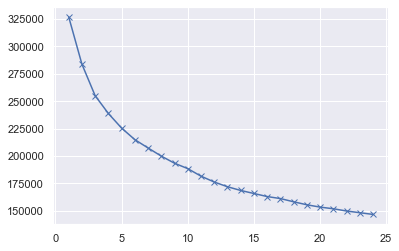

In [4]:
# Chang features to numpy array for calculation
feature_df = df.iloc[:,1:].copy()
feature_np = feature_df.to_numpy()
sum_distances = []

# Set k values for finding the optimal k value
K = range(1,25)
for k in K:
    k_means = KMeans(n_clusters=k, n_init=10, random_state=2)
    k_means.fit(feature_np)
    sum_distances.append(k_means.inertia_)
    
# Visualize the result
plt.plot(K, sum_distances, 'bx-')
plt.show()

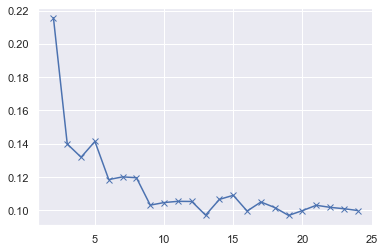

In [5]:
silhouette = []

# Set k values for finding the optimal k value
K = range(2,25)
for k in K:
    k_means = KMeans(n_clusters=k, n_init=10, random_state=1)
    k_means.fit(feature_np)
    cluster_label = k_means.predict(feature_np)
    silhouette.append(silhouette_score(feature_np, cluster_label))
    
plt.plot(K, silhouette, 'bx-')
plt.show()

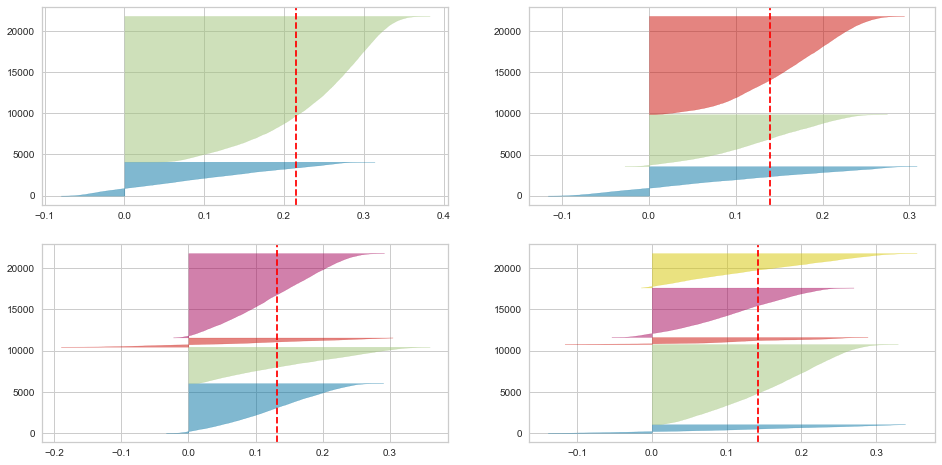

In [6]:
# To make sense the best k for model, visualize another chart for choosing k
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(16,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(feature_np)

In [7]:
# The codes for finding the optimal component values 
import itertools
from scipy import linalg

bic = []
n_components_range = range(1, 30)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, 
                              covariance_type=cv_type, random_state=2)
        gmm.fit(feature_np)
        bic.append(gmm.bic(feature_np))

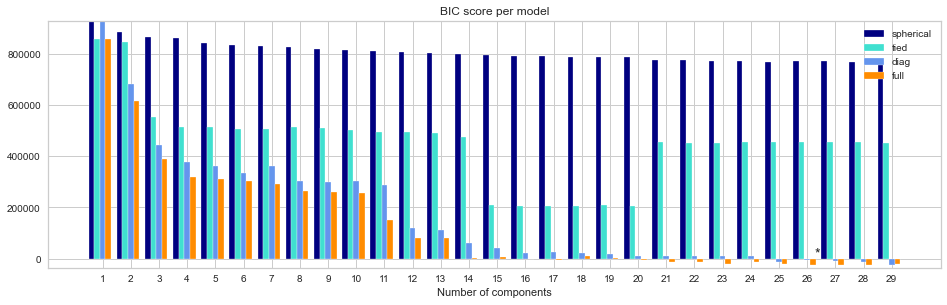

In [8]:
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
bars = []
# Plot the BIC scores
plt.figure(figsize=(16, 10))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [31]:
# Train model GMM
gmm = GaussianMixture(n_components=4, n_init=10, random_state=1)
gmm.fit(feature_np)
result_gmm = gmm.predict(feature_np)

In [32]:
# Train model K-Means
kmeans = KMeans(n_clusters=4, n_init=10, random_state=11)
k_means = kmeans.fit(feature_np)
cluster_label = k_means.predict(feature_np)

In [11]:
# Make a copy dataset
df_km = df.copy()
df_gmm = df.copy()

# Add the result labels into each model
df_km['label'] = cluster_label
df_gmm['label'] = result_gmm

In [13]:
# Function for calculating cosine similarity score
def cosine_sim(df_cosine):
    # Filter out numerical features
    features = df_cosine.iloc[:,1:-1]
    
    # Calculate Cosine Similarity on numerical features
    similarity = cosine_similarity(features)

    # Convert into calculated values into a dataframe
    sim_df = pd.DataFrame(similarity)
    sim_df = sim_df.set_index(df_cosine.iloc[:,0])
    sim_df.columns = df_cosine.iloc[:,0]
    sim_df['label'] = df_cosine.iloc[:,-1].to_numpy()
    
    return sim_df

In [14]:
# Return cosine similarity for both dataset
sim_km = cosine_sim(df_km)
sim_gmm = cosine_sim(df_gmm)

In [21]:
# Function for recommending similar songs with specified song
def recommend(name):
    # Get out the label of specified song and filter songs which are like "label"
    label_km = sim_km.at[name, 'label']
    filter_label_km = sim_km[sim_km['label'] == label_km]
    
    # Sort the Cosine scores from highest to lowest and drop out the specified song
    series_km = filter_label_km[name].sort_values(ascending=False)
    series_km.drop(name, axis=0, inplace=True)
    
    # Create a new dataset for the result
    km_result = series_km.head(10)
    km_result = pd.DataFrame(km_result)
    km_result.reset_index(inplace=True)
    
    # Get out the label of specified song and filter songs which are like "label"
    label_gmm = sim_gmm.at[name, 'label']
    filter_label_gmm = sim_gmm[sim_gmm['label'] == label_gmm]
    
    # Sort the Cosine scores from highest to lowest and drop out the specified song
    series_gmm = filter_label_gmm[name].sort_values(ascending=False)
    series_gmm.drop(name, axis=0, inplace=True)
    
    # Create a new dataset for the result
    gmm_result = series_gmm.head(10)
    gmm_result = pd.DataFrame(gmm_result)
    gmm_result.reset_index(inplace=True)
    
    c = pd.concat([km_result, gmm_result], axis=1)
        
    return c

In [22]:
recommend("attention - charlie puth")

,song_artist,attention - charlie puth,song_artist,attention - charlie puth
0,"me gusta - shakira, anuel aa",0.956846,how long - charlie puth,0.930140
1,how long - charlie puth,0.930140,"ritual - tiësto, jonas blue, rita ora",0.925092
2,"ritual - tiësto, jonas blue, rita ora",0.925092,no te vayas - camilo,0.923660
3,no te vayas - camilo,0.923660,no judgement - niall horan,0.921923
4,no judgement - niall horan,0.921923,wait a minute! - willow,0.920628
5,wait a minute! - willow,0.920628,feel it still - portugal. the man,0.914790
6,"mayores - becky g, bad bunny",0.915471,telepathy - bts,0.913396
7,feel it still - portugal. the man,0.914790,blue hour - tomorrow x together,0.912151
8,telepathy - bts,0.913396,s.l.u.t. - bea miller,0.909838
9,blue hour - tomorrow x together,0.912151,2002 - anne-marie,0.908858


In [23]:
'''Do reduce by the TSNE approach which make 
the multiple dimesions into 2 dimesions for graphing'''

from sklearn.manifold import TSNE

# Make a copy scaled dataframe and TSNE on it
reduce_dimesion = feature_df.copy()
tsne = TSNE(2, random_state=1)

# Fit and transform data
tsne_audio = tsne.fit_transform(reduce_dimesion)

# Take it into a new dataframe
tsne_df = pd.DataFrame(tsne_audio, columns=['X','Y'])
tsne_df.head()

,X,Y
0,-11.217824,-14.540420
1,42.622093,31.425377
2,-35.823612,30.079092
3,40.120598,10.842710
4,48.032810,-5.420588


In [33]:
# Add the cluster of K-means and GMM to the dataset
tsne_df['label_km'] = cluster_label
tsne_df['label_gmm'] = result_gmm

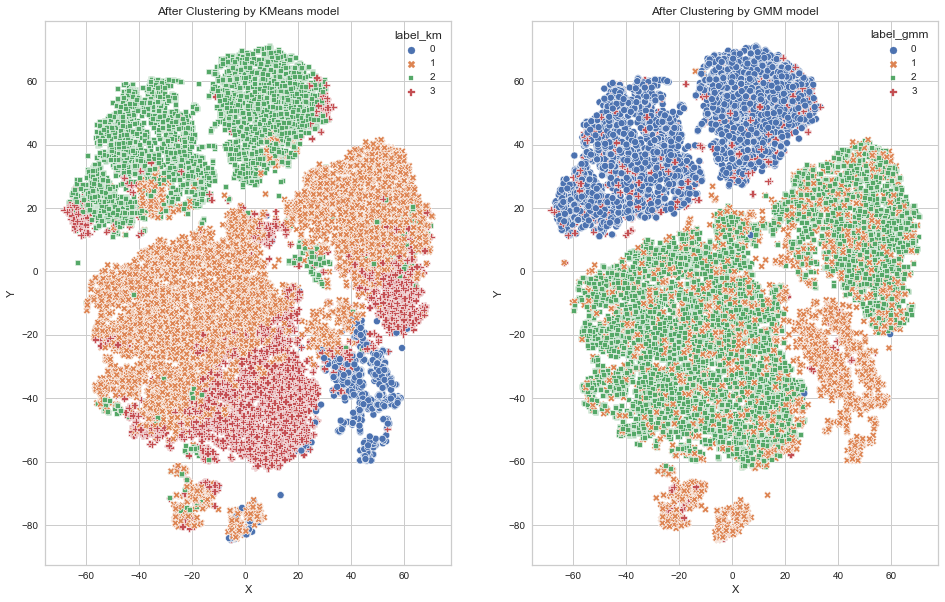

In [34]:
'''Visualize the scatter plot for original, 
K-means and GMM labels to compare the effect of models'''

fix, axes = plt.subplots(1,2, figsize=(16,10))

sns.scatterplot(ax=axes[0], x='X', y='Y', hue='label_km', style='label_km', palette='deep', data=tsne_df)
axes[0].set_title('After Clustering by KMeans model')

sns.scatterplot(ax=axes[1], x='X', y='Y', hue='label_gmm', style='label_gmm', palette='deep', data=tsne_df)
axes[1].set_title('After Clustering by GMM model')

plt.rc('legend')
plt.show()